In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medium-articles-dataset/medium_data.csv
/kaggle/input/medium-articles-dataset/images/1436.jpeg
/kaggle/input/medium-articles-dataset/images/6262.png
/kaggle/input/medium-articles-dataset/images/3750.jpg
/kaggle/input/medium-articles-dataset/images/2539.png
/kaggle/input/medium-articles-dataset/images/4657.jpeg
/kaggle/input/medium-articles-dataset/images/5900.jpeg
/kaggle/input/medium-articles-dataset/images/14.jpeg
/kaggle/input/medium-articles-dataset/images/55.jpeg
/kaggle/input/medium-articles-dataset/images/3757.jpg
/kaggle/input/medium-articles-dataset/images/1406.jpeg
/kaggle/input/medium-articles-dataset/images/4489.jpg
/kaggle/input/medium-articles-dataset/images/344.jpeg
/kaggle/input/medium-articles-dataset/images/3417.jpg
/kaggle/input/medium-articles-dataset/images/4989.jpeg
/kaggle/input/medium-articles-dataset/images/6441.png
/kaggle/input/medium-articles-dataset/images/5729.jpeg
/kaggle/input/medium-articles-dataset/images/2451.gif
/kaggle/input/medium-art

In [3]:
import pandas as pd
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
medium_data = pd.read_csv('../input/medium-articles-dataset/medium_data.csv')
medium_data.head()

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


In [5]:
medium_data['title'] = medium_data['title'].apply(lambda x: x.replace(u'\xa0',u' '))
medium_data['title'] = medium_data['title'].apply(lambda x: x.replace('\u200a',' '))

In [6]:
tokenizer = Tokenizer(oov_token='<oov>') # For those words which are not found in word_index
tokenizer.fit_on_texts(medium_data['title'])
total_words = len(tokenizer.word_index) + 1


In [7]:
input_sequences = []
for line in medium_data['title']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    #print(token_list)
    
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


In [8]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5, 676,
        68], dtype=int32)

In [9]:
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)


In [10]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=50, verbose=1)
#print model.summary()
print(model)

Epoch 1/50
1515/1515 [==============================] - 38s 22ms/step - loss: 6.9935 - accuracy: 0.0856
Epoch 2/50
1515/1515 [==============================] - 17s 12ms/step - loss: 6.1663 - accuracy: 0.1401
Epoch 3/50
1515/1515 [==============================] - 17s 11ms/step - loss: 5.6461 - accuracy: 0.1678
Epoch 4/50
1515/1515 [==============================] - 16s 11ms/step - loss: 5.1667 - accuracy: 0.1931
Epoch 5/50
1515/1515 [==============================] - 16s 11ms/step - loss: 4.7101 - accuracy: 0.2203
Epoch 6/50
1515/1515 [==============================] - 16s 11ms/step - loss: 4.2793 - accuracy: 0.2507
Epoch 7/50
1515/1515 [==============================] - 16s 11ms/step - loss: 3.8740 - accuracy: 0.2906
Epoch 8/50
1515/1515 [==============================] - 16s 11ms/step - loss: 3.4923 - accuracy: 0.3439
Epoch 9/50
1515/1515 [==============================] - 16s 11ms/step - loss: 3.1386 - accuracy: 0.3994
Epoch 10/50
1515/1515 [==============================] - 16s 10m

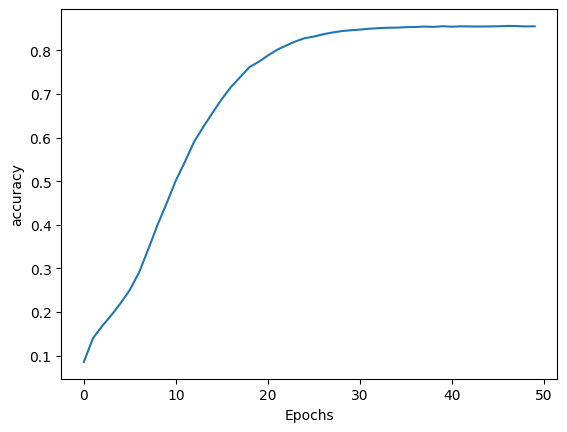

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

plot_graphs(history, 'accuracy')

In [22]:
import numpy as np

seed_text = "Hands on"
next_words = 25
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted_probs = model.predict(token_list, verbose=0)[0]
    predicted_index = np.argmax(predicted_probs)
    
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted_index:
            output_word = word
            break
            
    seed_text += " " + output_word

print(seed_text)


Hands on graph neural networks with pytorch pytorch geometric apache jena sparql engine — save from the lego® pray my leggings my influencing stft in docker minutes
